In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

100%|██████████| 163M/163M [09:57<00:00, 286kB/s] 

Extracting files...


Path to dataset files: /home/muhammad/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [8]:
# load model
# %pip install tensorflow_hub
import tensorflow_hub as hub

from tensorflow.keras.layers import Layer

# Define the custom Cast layer if needed
class Cast(Layer):
    def call(self, inputs):
        return tf.cast(inputs, tf.float32)

model = tf.keras.models.load_model(
    'face_mask_detection.h5',
    custom_objects={'KerasLayer': hub.KerasLayer, 'Cast': Cast}
)

# Define the image size expected by the model
IMAGE_SIZE = 224  # Replace 224 with the size expected by your model if different

# Define class names corresponding to the model's output
class_names = ['Mask', 'No Mask']  # Replace with your actual class names if different

# Predict on new images
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rgb = tf.keras.applications.mobilenet_v2.preprocess_input(rgb)
    rgb = np.expand_dims(rgb, axis=0)
    pred = model.predict(rgb)
    return class_names[np.argmax(pred)]

# Example usage
image_path = 'mask.jpg'
predicted_class = predict_image(image_path)
print(f"Predicted class for {image_path}: {predicted_class}")

2025-05-02 16:24:23.061827: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class for mask.jpg: Mask


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/

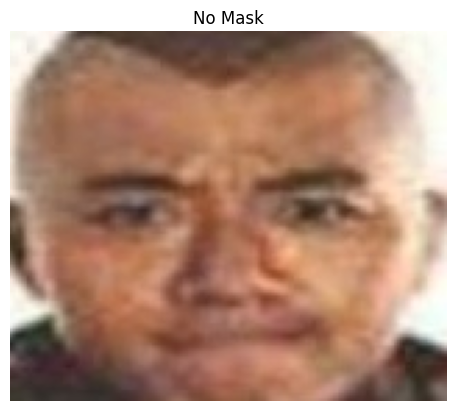

Predicted class for test/without_mask_20.jpg: No Mask


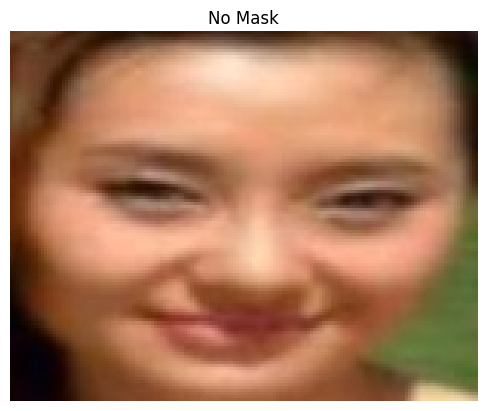

Predicted class for test/without_mask_4.jpg: No Mask


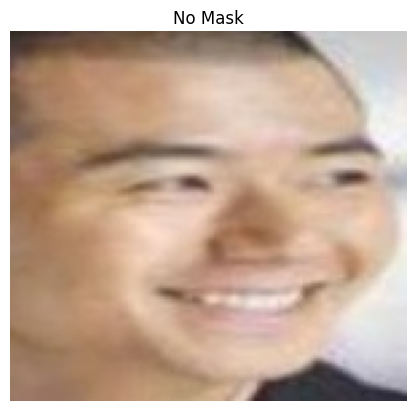

Predicted class for test/without_mask_2.jpg: No Mask


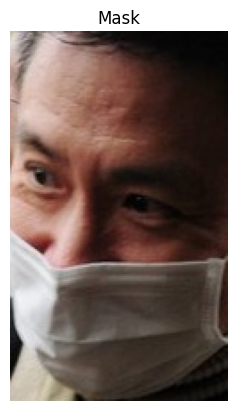

Predicted class for test/with_mask_20.jpg: Mask


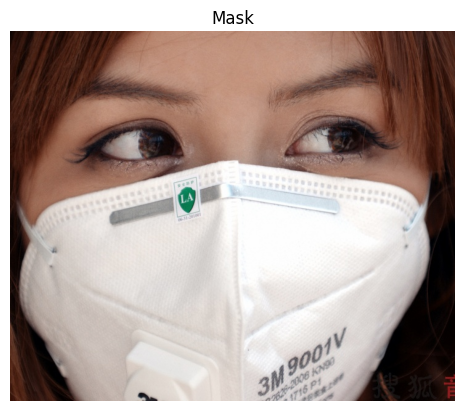

Predicted class for test/with_mask_23.jpg: Mask


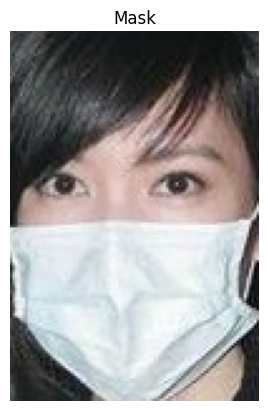

Predicted class for test/with_mask_5.jpg: Mask


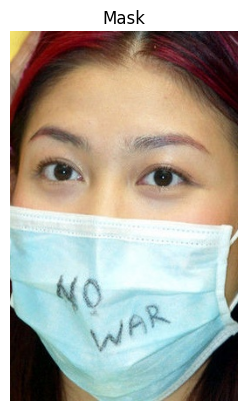

Predicted class for test/with_mask_42.jpg: Mask


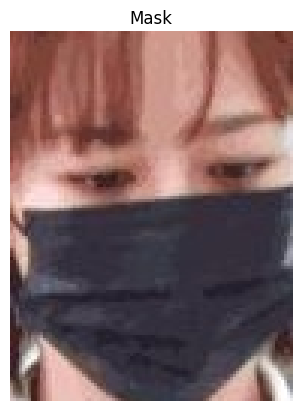

Predicted class for test/with_mask_59.jpg: Mask


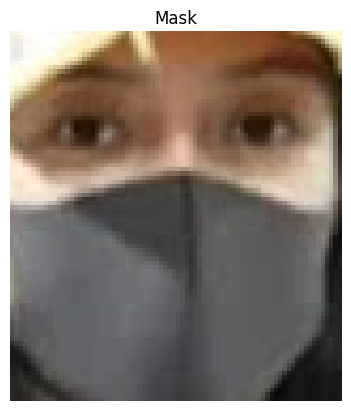

Predicted class for test/with_mask_60.jpg: Mask


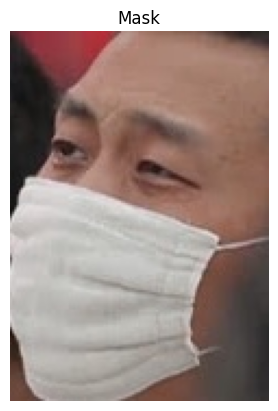

Predicted class for test/with_mask_19.jpg: Mask


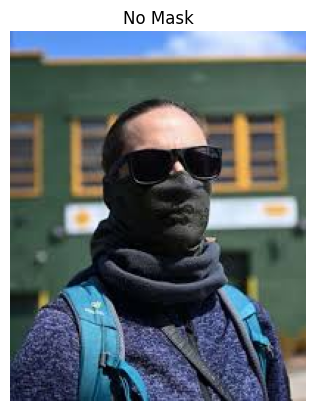

Predicted class for test/with_mask_2.jpg: No Mask


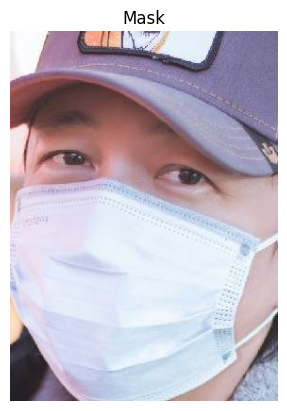

Predicted class for test/with_mask_57.jpg: Mask


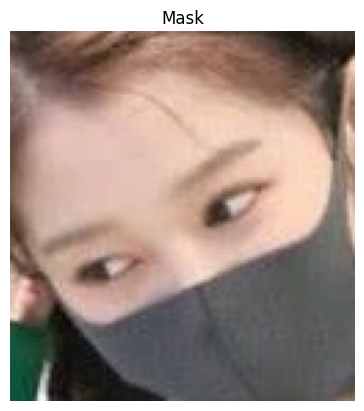

Predicted class for test/with_mask_41.jpg: Mask


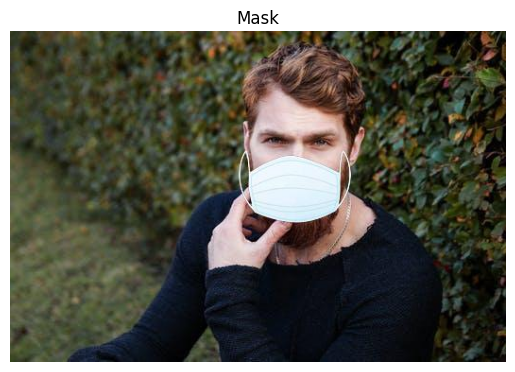

Predicted class for test/with_mask_1.jpg: Mask


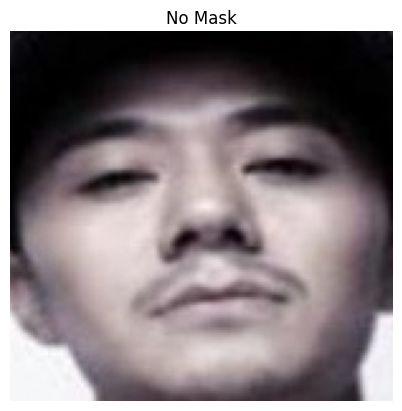

Predicted class for test/without_mask_6.jpg: No Mask


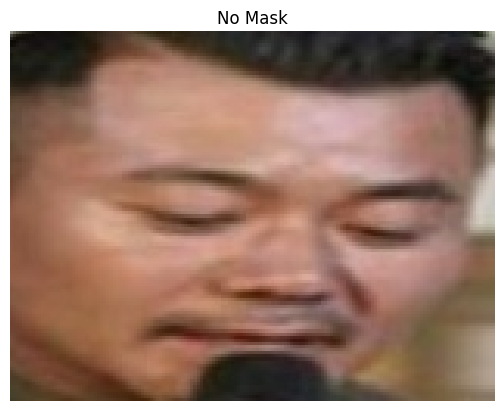

Predicted class for test/without_mask_23.jpg: No Mask


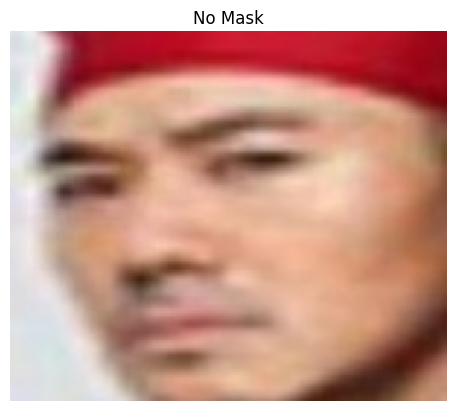

Predicted class for test/without_mask_19.jpg: No Mask


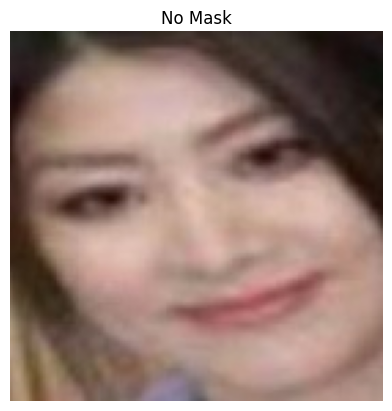

Predicted class for test/without_mask_3.jpg: No Mask


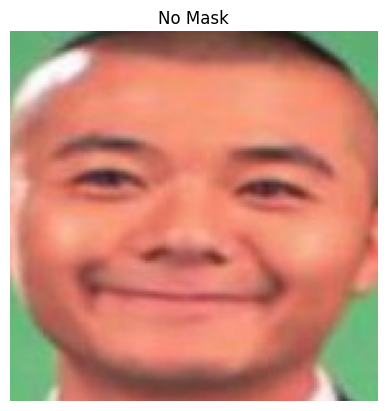

Predicted class for test/without_mask_5.jpg: No Mask


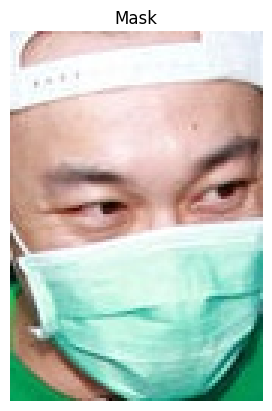

Predicted class for test/with_mask_24.jpg: Mask


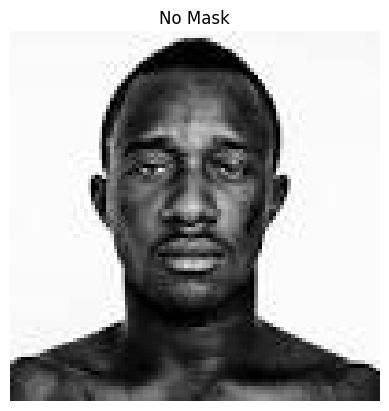

Predicted class for test/without_mask_1.jpg: No Mask


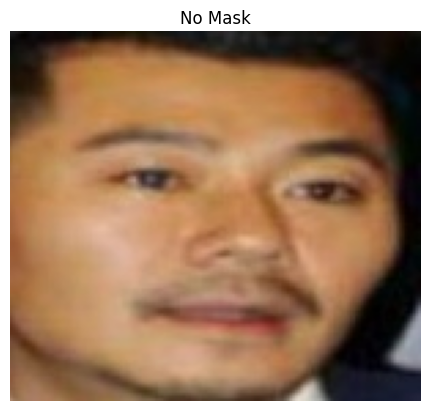

Predicted class for test/without_mask_22.jpg: No Mask


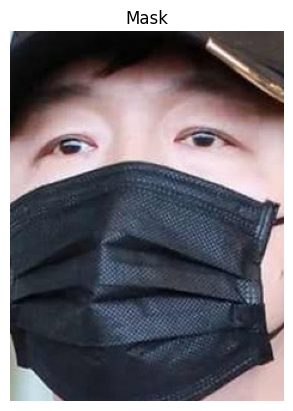

Predicted class for test/with_mask_55.jpg: Mask


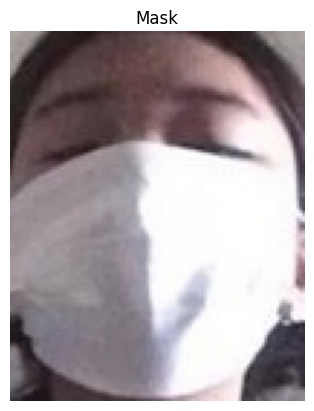

Predicted class for test/with_mask_4.jpg: Mask


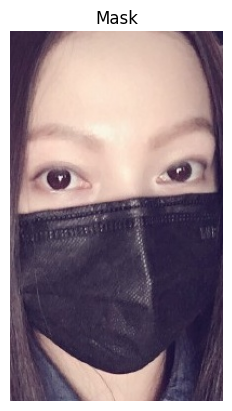

Predicted class for test/with_mask_22.jpg: Mask


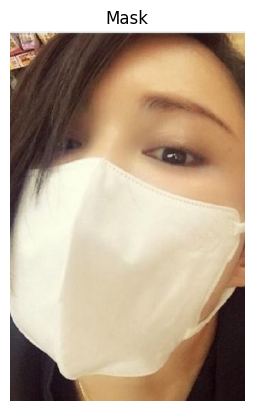

Predicted class for test/with_mask_21.jpg: Mask


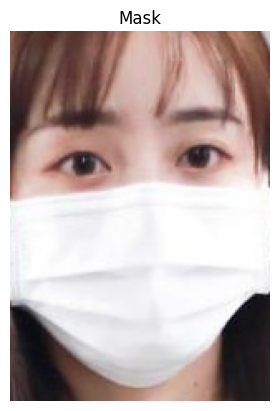

Predicted class for test/with_mask_58.jpg: Mask


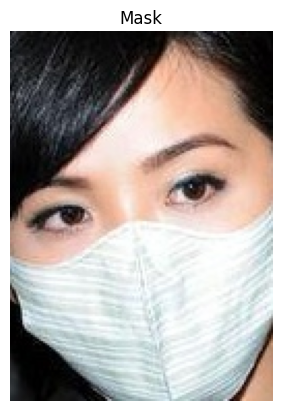

Predicted class for test/with_mask_40.jpg: Mask


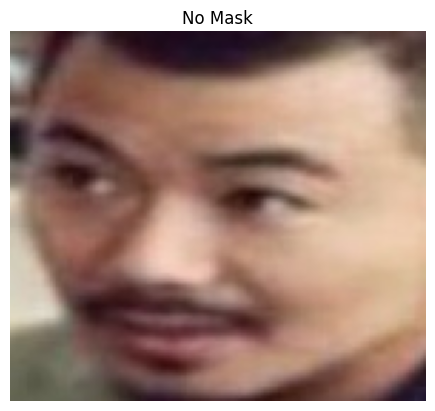

Predicted class for test/without_mask_24.jpg: No Mask


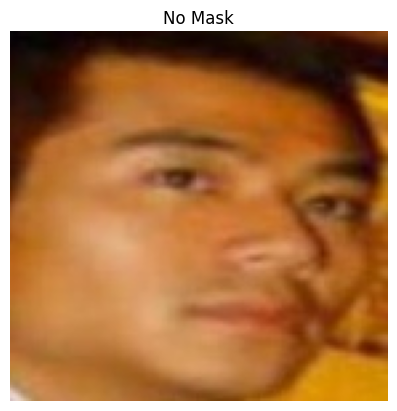

Predicted class for test/without_mask_21.jpg: No Mask


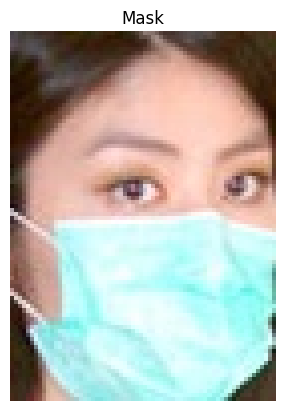

Predicted class for test/with_mask_3.jpg: Mask


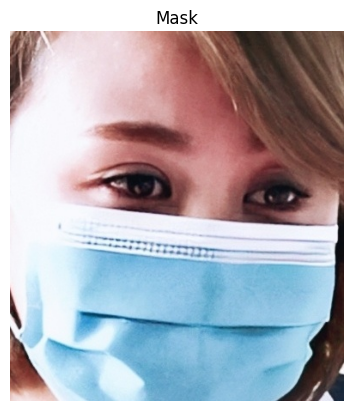

Predicted class for test/with_mask_56.jpg: Mask


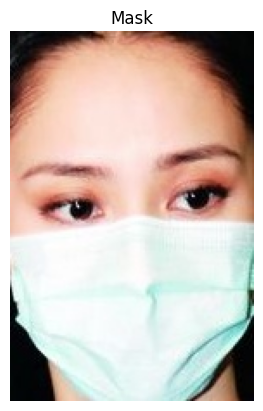

Predicted class for test/with_mask_6.jpg: Mask


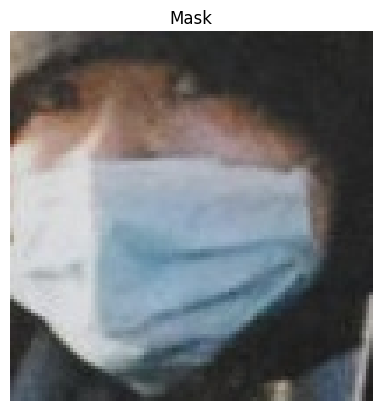

Predicted class for test/with_mask_38.jpg: Mask


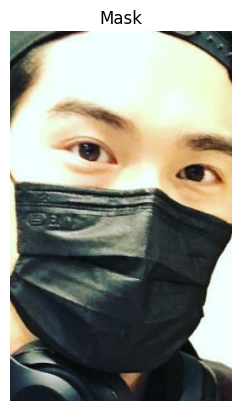

Predicted class for test/with_mask_37.jpg: Mask


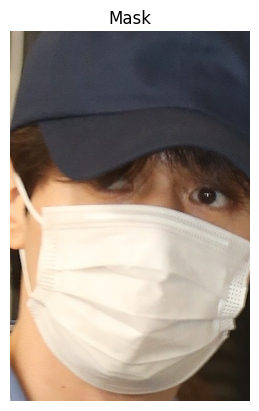

Predicted class for test/with_mask_39.jpg: Mask


In [11]:
# Predict on a directory of images
def predict_directory(directory_path):
    image_paths = glob(os.path.join(directory_path, '*'))
    predictions = {}
    for image_path in image_paths:
        predicted_class = predict_image(image_path)
        predictions[image_path] = predicted_class
    return predictions

# Show output as image and label on the top

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show_image_with_label(image_path, label):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()
# Example usage
directory_path = 'test/'  # Replace with your directory path
predictions = predict_directory(directory_path)
for image_path, label in predictions.items():
    show_image_with_label(image_path, label)
    print(f"Predicted class for {image_path}: {label}")

In [9]:
# Predict on a live video stream with 30 fps 
def predict_live_video():
    cap = cv2.VideoCapture(0)  # Use 0 for the default camera
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        img = cv2.resize(frame, (IMAGE_SIZE, IMAGE_SIZE))
        rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        rgb = tf.keras.applications.mobilenet_v2.preprocess_input(rgb)
        rgb = np.expand_dims(rgb, axis=0)
        pred = model.predict(rgb)
        label = class_names[np.argmax(pred)]
        
        # Display the label on the frame
        cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        cv2.imshow('Live Video', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
# Example usage
predict_live_video()

# Note: To stop the live video, press 'q' in the video window.

[ WARN:0@1238.053] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@1238.054] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
